# COVID-19 death prediction using best model between Linear, SVM, and Lasso Regression
# Machine Learning Project

## Performed by R.Navarro, BSN, RN, CPAN, CCRN Alumnus

### Source (includes Data Dictionary):
[https://healthdata.gov/Hospital/COVID-19-Reported-Patient-Impact-and-Hospital-Capa/g62h-syeh/about_data](https://healthdata.gov/Hospital/COVID-19-Reported-Patient-Impact-and-Hospital-Capa/g62h-syeh/about_data)

The dataset is provided by the U.S. Department of Health & Human Services and showcases data for COVID-19 hospitalizations in the United States (includes information such as hospital admissions, hospital occupancy, bed utilization, staffing shortages, etc.) starting from January 1st, 2020. The last update to the dataset was on May 3rd, 2024. 

The goal is to predict the number of COVID-19 deaths using the best model between Linear Regression, SVM Regression and Lasso Regression.

### I - Get the Data

In [4]:
import pandas as pd
import numpy as np

To upload in Google Colab:

In [6]:
#from google.colab import files

#uploaded = files.upload()

#import io
#import pandas as pd

#covid = pd.read_csv(io.BytesIO(uploaded['COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State_Timeseries__RAW__20241129.csv']))

In [7]:
covid = pd.read_csv('COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State_Timeseries__RAW__20241129.csv')

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [8]:
covid.shape

(81713, 135)

```
---
81713 INSTANCES (Rows)
135 FEATURES/ATTRIBUTES (Columns)
---
```

In [10]:
covid.columns

Index(['state', 'date', 'critical_staffing_shortage_today_yes',
       'critical_staffing_shortage_today_no',
       'critical_staffing_shortage_today_not_reported',
       'critical_staffing_shortage_anticipated_within_week_yes',
       'critical_staffing_shortage_anticipated_within_week_no',
       'critical_staffing_shortage_anticipated_within_week_not_reported',
       'hospital_onset_covid', 'hospital_onset_covid_coverage',
       ...
       'previous_day_admission_pediatric_covid_confirmed_5_11',
       'previous_day_admission_pediatric_covid_confirmed_5_11_coverage',
       'previous_day_admission_pediatric_covid_confirmed_unknown',
       'previous_day_admission_pediatric_covid_confirmed_unknown_coverage',
       'staffed_icu_pediatric_patients_confirmed_covid',
       'staffed_icu_pediatric_patients_confirmed_covid_coverage',
       'staffed_pediatric_icu_bed_occupancy',
       'staffed_pediatric_icu_bed_occupancy_coverage',
       'total_staffed_pediatric_icu_beds',
       't

```
---
Column names from dataset.
---
```

In [12]:
covid.describe()

,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,inpatient_beds,inpatient_beds_coverage,...,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_5_11_coverage,previous_day_admission_pediatric_covid_confirmed_unknown,previous_day_admission_pediatric_covid_confirmed_unknown_coverage,staffed_icu_pediatric_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid_coverage,staffed_pediatric_icu_bed_occupancy,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage
count,81713.000000,81713.000000,81713.000000,81713.000000,81713.000000,81713.000000,80756.000000,81713.000000,81708.000000,81713.000000,...,44677.000000,81713.000000,45417.000000,81713.000000,51564.000000,81713.000000,73410.000000,81713.000000,73397.000000,81713.000000
mean,7.856608,47.398945,47.450271,12.639837,62.446465,27.619522,20.026091,85.638319,13285.218718,101.101759,...,0.523961,50.954793,0.585420,52.932557,2.612288,57.650239,158.189348,78.873974,237.000627,78.738242
std,14.923570,59.023908,69.327673,18.915257,59.395291,58.285291,48.785796,86.808464,14600.411077,90.828977,...,1.361718,77.433429,4.138465,79.509095,5.797625,80.051161,268.134969,85.595748,404.702566,85.618299
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,5.000000,1.000000,17.000000,3.000000,1.000000,27.000000,3100.000000,43.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,15.000000,29.000000,15.000000
50%,2.000000,24.000000,22.000000,6.000000,52.000000,10.000000,6.000000,61.000000,8833.000000,90.000000,...,0.000000,13.000000,0.000000,13.000000,1.000000,26.000000,66.000000,59.000000,101.000000,59.000000
75%,10.000000,78.000000,64.000000,18.000000,89.000000,29.000000,19.000000,116.000000,16895.000000,132.000000,...,1.000000,87.000000,0.000000,93.000000,3.000000,95.000000,174.000000,112.000000,258.000000,112.000000
max,191.000000,494.000000,523.000000,204.000000,469.000000,523.000000,1334.000000,597.000000,108966.000000,598.000000,...,101.000000,591.000000,155.000000,595.000000,346.000000,595.000000,2580.000000,597.000000,3917.000000,597.000000


```
---
Summary statistics of numerical columns of the dataset.
---
```

In [14]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81713 entries, 0 to 81712
Columns: 135 entries, state to total_staffed_pediatric_icu_beds_coverage
dtypes: float64(77), int64(56), object(2)
memory usage: 84.2+ MB


```
---
Summary of dataset which includes data types of the columns.
---
```

In [16]:
covid.isnull().sum()

state                                                         0
date                                                          0
critical_staffing_shortage_today_yes                          0
critical_staffing_shortage_today_no                           0
critical_staffing_shortage_today_not_reported                 0
                                                           ... 
staffed_icu_pediatric_patients_confirmed_covid_coverage       0
staffed_pediatric_icu_bed_occupancy                        8303
staffed_pediatric_icu_bed_occupancy_coverage                  0
total_staffed_pediatric_icu_beds                           8316
total_staffed_pediatric_icu_beds_coverage                     0
Length: 135, dtype: int64

```
---
Numerous null values noted.
---
```

In [18]:
covid.head(25)

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,...,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_5_11_coverage,previous_day_admission_pediatric_covid_confirmed_unknown,previous_day_admission_pediatric_covid_confirmed_unknown_coverage,staffed_icu_pediatric_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid_coverage,staffed_pediatric_icu_bed_occupancy,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage
0,MA,2021/06/15,6,72,1,6,72,1,4.0,78,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
1,WY,2021/06/13,2,26,2,3,25,2,0.0,28,...,NaN,0,NaN,0,NaN,0,0.0,8,0.0,8
2,LA,2021/06/06,41,176,6,41,176,6,2.0,217,...,NaN,0,NaN,0,NaN,0,5.0,4,11.0,4
3,RI,2021/06/04,4,9,2,4,9,2,5.0,14,...,NaN,0,NaN,0,NaN,0,78.0,14,96.0,14
4,KS,2021/06/03,13,133,4,15,131,4,1.0,147,...,NaN,0,NaN,0,NaN,0,81.0,147,273.0,147
5,ME,2021/06/03,2,28,9,1,29,9,3.0,38,...,NaN,0,NaN,0,NaN,0,23.0,30,24.0,30
6,RI,2021/06/02,4,10,1,4,10,1,5.0,14,...,NaN,0,NaN,0,NaN,0,68.0,14,96.0,14
7,ME,2021/05/30,1,29,9,1,29,9,3.0,38,...,NaN,0,NaN,0,NaN,0,22.0,30,22.0,30
8,RI,2021/05/30,3,11,1,4,10,1,5.0,14,...,NaN,0,NaN,0,NaN,0,72.0,14,96.0,14
9,MS,2021/05/28,10,96,2,12,94,2,3.0,106,...,NaN,0,NaN,0,NaN,0,86.0,106,177.0,106


```
---
First 25 rows from dataset.
---
```

In [20]:
covid = covid.fillna(0)

```
---
Null values imputed to a value of 0.
---
```

In [22]:
covid.isnull().sum()

state                                                      0
date                                                       0
critical_staffing_shortage_today_yes                       0
critical_staffing_shortage_today_no                        0
critical_staffing_shortage_today_not_reported              0
                                                          ..
staffed_icu_pediatric_patients_confirmed_covid_coverage    0
staffed_pediatric_icu_bed_occupancy                        0
staffed_pediatric_icu_bed_occupancy_coverage               0
total_staffed_pediatric_icu_beds                           0
total_staffed_pediatric_icu_beds_coverage                  0
Length: 135, dtype: int64

```
---
No null values due to imputation.
---
```

In [24]:
covid = covid.drop(['state', 'date'], axis='columns')

```
---
'state' and 'date' columns dropped to enable working only with numerical features.
---
```

In [26]:
covid.shape

(81713, 133)

```
--
Columns decreased from 135 to 133 (since 'state' and 'date' columns dropped).
---
```

In [28]:
covid_target = covid['deaths_covid']

covid_target

0        0.0
1        1.0
2        0.0
3        1.0
4        1.0
        ... 
81708    0.0
81709    0.0
81710    0.0
81711    0.0
81712    0.0
Name: deaths_covid, Length: 81713, dtype: float64

```
---
'deaths_covid' column = TARGET/LABEL

--
```

In [30]:
covid_features = covid.drop(['deaths_covid'], axis='columns')

covid_features.head()

,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,inpatient_beds,inpatient_beds_coverage,...,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_5_11_coverage,previous_day_admission_pediatric_covid_confirmed_unknown,previous_day_admission_pediatric_covid_confirmed_unknown_coverage,staffed_icu_pediatric_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid_coverage,staffed_pediatric_icu_bed_occupancy,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage
0,6,72,1,6,72,1,4.0,78,17049.0,79,...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0
1,2,26,2,3,25,2,0.0,28,1525.0,30,...,0.0,0,0.0,0,0.0,0,0.0,8,0.0,8
2,41,176,6,41,176,6,2.0,217,13955.0,223,...,0.0,0,0.0,0,0.0,0,5.0,4,11.0,4
3,4,9,2,4,9,2,5.0,14,2579.0,15,...,0.0,0,0.0,0,0.0,0,78.0,14,96.0,14
4,13,133,4,15,131,4,1.0,147,9008.0,150,...,0.0,0,0.0,0,0.0,0,81.0,147,273.0,147


```
---
First 5 rows of dataset with the included FEATURES/ATTRIBUTES (132 total).
---
```

In [32]:
covid_features.shape

(81713, 132)

```
---
81713 INSTANCES (Rows)
132 FEATURES/ATTRIBUTES (Columns)
---
```

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(covid_features, covid_target, test_size=0.20, random_state=42)

```
---
Creation of 'X_train', 'X_test', 'y_train', 'y_test' (80% training data, 20% test data).
---
```

### II - Explore the Data

In [38]:
X_train.describe()

,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,inpatient_beds,inpatient_beds_coverage,...,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_5_11_coverage,previous_day_admission_pediatric_covid_confirmed_unknown,previous_day_admission_pediatric_covid_confirmed_unknown_coverage,staffed_icu_pediatric_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid_coverage,staffed_pediatric_icu_bed_occupancy,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage
count,65370.000000,65370.000000,65370.000000,65370.000000,65370.000000,65370.000000,65370.000000,65370.000000,65370.000000,65370.000000,...,65370.000000,65370.000000,65370.000000,65370.000000,65370.000000,65370.000000,65370.000000,65370.000000,65370.000000,65370.000000
mean,7.899296,47.573489,47.572373,12.691219,62.679501,27.674438,19.957855,85.808215,13358.062139,101.480037,...,0.282041,51.032415,0.328132,53.002708,1.655821,57.753939,142.969787,79.038795,214.219153,78.898516
std,15.069742,59.429861,69.418124,19.082950,59.738463,58.347241,49.088477,86.995993,14678.046025,91.162558,...,0.964221,77.403153,3.146394,79.484132,4.832084,80.034635,260.794008,85.660473,393.739015,85.679584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,5.000000,1.000000,17.000000,3.000000,1.000000,27.000000,3084.250000,44.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,15.000000,11.000000,15.000000
50%,2.000000,24.000000,22.000000,6.000000,52.000000,10.000000,5.000000,61.000000,8848.000000,91.000000,...,0.000000,13.000000,0.000000,13.000000,0.000000,26.000000,54.000000,59.000000,84.000000,59.000000
75%,10.000000,78.000000,65.000000,18.000000,90.000000,29.000000,19.000000,116.000000,16989.750000,132.000000,...,0.000000,87.000000,0.000000,93.000000,1.000000,96.000000,155.000000,112.000000,230.000000,112.000000
max,187.000000,494.000000,523.000000,204.000000,469.000000,523.000000,1334.000000,597.000000,78800.000000,598.000000,...,43.000000,591.000000,155.000000,595.000000,346.000000,595.000000,2580.000000,597.000000,3917.000000,597.000000


```
---
Summary statistics for 'X_train'.
---
```

In [40]:
num_cols = ['critical_staffing_shortage_today_yes', 'critical_staffing_shortage_today_no', 'critical_staffing_shortage_today_not_reported',
            'critical_staffing_shortage_anticipated_within_week_yes', 'critical_staffing_shortage_anticipated_within_week_no',
            'critical_staffing_shortage_anticipated_within_week_not_reported', 'hospital_onset_covid', 'hospital_onset_covid_coverage',
            'inpatient_beds', 'inpatient_beds_coverage', 'inpatient_beds_used', 'inpatient_beds_used_coverage', 'inpatient_beds_used_covid',
            'inpatient_beds_used_covid_coverage', 'previous_day_admission_adult_covid_confirmed',
            'previous_day_admission_adult_covid_confirmed_coverage', 'previous_day_admission_adult_covid_suspected',
            'previous_day_admission_adult_covid_suspected_coverage', 'previous_day_admission_pediatric_covid_confirmed',
            'previous_day_admission_pediatric_covid_confirmed_coverage', 'previous_day_admission_pediatric_covid_suspected',
            'previous_day_admission_pediatric_covid_suspected_coverage', 'staffed_adult_icu_bed_occupancy',
            'staffed_adult_icu_bed_occupancy_coverage', 'staffed_icu_adult_patients_confirmed_and_suspected_covid',
            'staffed_icu_adult_patients_confirmed_and_suspected_covid_coverage', 'staffed_icu_adult_patients_confirmed_covid',
            'staffed_icu_adult_patients_confirmed_covid_coverage', 'total_adult_patients_hospitalized_confirmed_and_suspected_covid',
            'total_adult_patients_hospitalized_confirmed_and_suspected_covid_coverage',	'total_adult_patients_hospitalized_confirmed_covid',
            'total_adult_patients_hospitalized_confirmed_covid_coverage',
            'total_pediatric_patients_hospitalized_confirmed_and_suspected_covid',
            'total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_coverage',
            'total_pediatric_patients_hospitalized_confirmed_covid', 'total_pediatric_patients_hospitalized_confirmed_covid_coverage',
            'total_staffed_adult_icu_beds', 'total_staffed_adult_icu_beds_coverage', 'inpatient_beds_utilization',
            'inpatient_beds_utilization_coverage', 'inpatient_beds_utilization_numerator', 'inpatient_beds_utilization_denominator',
            'percent_of_inpatients_with_covid', 'percent_of_inpatients_with_covid_coverage', 'percent_of_inpatients_with_covid_numerator',
            'percent_of_inpatients_with_covid_denominator', 'inpatient_bed_covid_utilization', 'inpatient_bed_covid_utilization_coverage',
            'inpatient_bed_covid_utilization_numerator', 'inpatient_bed_covid_utilization_denominator', 'adult_icu_bed_covid_utilization',
            'adult_icu_bed_covid_utilization_coverage', 'adult_icu_bed_covid_utilization_numerator', 'adult_icu_bed_covid_utilization_denominator',
            'adult_icu_bed_utilization', 'adult_icu_bed_utilization_coverage', 'adult_icu_bed_utilization_numerator',
            'adult_icu_bed_utilization_denominator', 'geocoded_state', 'previous_day_admission_adult_covid_confirmed_18-19',
            'previous_day_admission_adult_covid_confirmed_18-19_coverage', 'previous_day_admission_adult_covid_confirmed_20-29',
            'previous_day_admission_adult_covid_confirmed_20-29_coverage', 'previous_day_admission_adult_covid_confirmed_30-39',
            'previous_day_admission_adult_covid_confirmed_30-39_coverage', 'previous_day_admission_adult_covid_confirmed_40-49',
            'previous_day_admission_adult_covid_confirmed_40-49_coverage', 'previous_day_admission_adult_covid_confirmed_50-59',
            'previous_day_admission_adult_covid_confirmed_50-59_coverage', 'previous_day_admission_adult_covid_confirmed_60-69',
            'previous_day_admission_adult_covid_confirmed_60-69_coverage', 'previous_day_admission_adult_covid_confirmed_70-79',
            'previous_day_admission_adult_covid_confirmed_70-79_coverage', 'previous_day_admission_adult_covid_confirmed_80+',
            'previous_day_admission_adult_covid_confirmed_80+_coverage', 'previous_day_admission_adult_covid_confirmed_unknown',
            'previous_day_admission_adult_covid_confirmed_unknown_coverage', 'previous_day_admission_adult_covid_suspected_18-19',
            'previous_day_admission_adult_covid_suspected_18-19_coverage', 'previous_day_admission_adult_covid_suspected_20-29',
            'previous_day_admission_adult_covid_suspected_20-29_coverage', 'previous_day_admission_adult_covid_suspected_30-39',
            'previous_day_admission_adult_covid_suspected_30-39_coverage', 'previous_day_admission_adult_covid_suspected_40-49',
            'previous_day_admission_adult_covid_suspected_40-49_coverage', 'previous_day_admission_adult_covid_suspected_50-59',
            'previous_day_admission_adult_covid_suspected_50-59_coverage', 'previous_day_admission_adult_covid_suspected_60-69',
            'previous_day_admission_adult_covid_suspected_60-69_coverage', 'previous_day_admission_adult_covid_suspected_70-79',
            'previous_day_admission_adult_covid_suspected_70-79_coverage', 'previous_day_admission_adult_covid_suspected_80+',
            'previous_day_admission_adult_covid_suspected_80+_coverage', 'previous_day_admission_adult_covid_suspected_unknown',
            'previous_day_admission_adult_covid_suspected_unknown_coverage', 'deaths_covid', 'deaths_covid_coverage',
            'on_hand_supply_therapeutic_a_casirivimab_imdevimab_courses', 'on_hand_supply_therapeutic_b_bamlanivimab_courses',
            'on_hand_supply_therapeutic_c_bamlanivimab_etesevimab_courses', 'previous_week_therapeutic_a_casirivimab_imdevimab_courses_used',
            'previous_week_therapeutic_b_bamlanivimab_courses_used', 'previous_week_therapeutic_c_bamlanivimab_etesevimab_courses_used',
            'icu_patients_confirmed_influenza', 'icu_patients_confirmed_influenza_coverage', 'previous_day_admission_influenza_confirmed',
            'previous_day_admission_influenza_confirmed_coverage', 'previous_day_deaths_covid_and_influenza',
            'previous_day_deaths_covid_and_influenza_coverage', 'previous_day_deaths_influenza', 'previous_day_deaths_influenza_coverage',
            'total_patients_hospitalized_confirmed_influenza', 'total_patients_hospitalized_confirmed_influenza_and_covid',
            'total_patients_hospitalized_confirmed_influenza_and_covid_coverage', 'total_patients_hospitalized_confirmed_influenza_coverage',
            'all_pediatric_inpatient_bed_occupied', 'all_pediatric_inpatient_bed_occupied_coverage', 'all_pediatric_inpatient_beds',
            'all_pediatric_inpatient_beds_coverage', 'previous_day_admission_pediatric_covid_confirmed_0_4',
            'previous_day_admission_pediatric_covid_confirmed_0_4_coverage', 'previous_day_admission_pediatric_covid_confirmed_12_17',
            'previous_day_admission_pediatric_covid_confirmed_12_17_coverage', 'previous_day_admission_pediatric_covid_confirmed_5_11',
            'previous_day_admission_pediatric_covid_confirmed_5_11_coverage', 'previous_day_admission_pediatric_covid_confirmed_unknown',
            'previous_day_admission_pediatric_covid_confirmed_unknown_coverage', 'staffed_icu_pediatric_patients_confirmed_covid',
            'staffed_icu_pediatric_patients_confirmed_covid_coverage', 'staffed_pediatric_icu_bed_occupancy',
            'staffed_pediatric_icu_bed_occupancy_coverage', 'total_staffed_pediatric_icu_beds', 'total_staffed_pediatric_icu_beds_coverage']

In [41]:
corr_matrix = covid[num_cols].corr()

corr_matrix

,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,inpatient_beds,inpatient_beds_coverage,...,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_5_11_coverage,previous_day_admission_pediatric_covid_confirmed_unknown,previous_day_admission_pediatric_covid_confirmed_unknown_coverage,staffed_icu_pediatric_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid_coverage,staffed_pediatric_icu_bed_occupancy,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage
critical_staffing_shortage_today_yes,1.000000,0.710658,-0.154687,0.850663,0.562140,-0.057196,0.176708,0.572497,0.406265,0.510011,...,-0.035058,-0.123321,0.045397,-0.121402,-0.004160,-0.073475,0.437087,0.253495,0.465020,0.252569
critical_staffing_shortage_today_no,0.710658,1.000000,-0.131650,0.678810,0.839274,-0.037510,0.331638,0.740209,0.629489,0.673420,...,0.087564,0.052798,0.115376,0.064247,0.128373,0.107406,0.568840,0.465035,0.589183,0.464207
critical_staffing_shortage_today_not_reported,-0.154687,-0.131650,1.000000,0.044500,0.168118,0.830768,0.165457,0.438968,0.543134,0.627272,...,0.345255,0.709783,0.078375,0.696876,0.394205,0.685320,0.312080,0.607714,0.237680,0.607901
critical_staffing_shortage_anticipated_within_week_yes,0.850663,0.678810,0.044500,1.000000,0.677624,-0.056907,0.248334,0.683326,0.529055,0.619917,...,0.117008,0.140721,0.090684,0.140724,0.213151,0.179587,0.481969,0.422077,0.498675,0.421553
critical_staffing_shortage_anticipated_within_week_no,0.562140,0.839274,0.168118,0.677624,1.000000,-0.045142,0.316669,0.744584,0.730941,0.778202,...,0.166106,0.356388,0.104988,0.365847,0.261993,0.393666,0.607211,0.648674,0.613553,0.648398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
staffed_icu_pediatric_patients_confirmed_covid_coverage,-0.073475,0.107406,0.685320,0.179587,0.393666,0.445667,0.203559,0.407200,0.533977,0.587861,...,0.484904,0.962119,0.108959,0.960702,0.584567,1.000000,0.340243,0.756514,0.281795,0.756078
staffed_pediatric_icu_bed_occupancy,0.437087,0.568840,0.312080,0.481969,0.607211,0.283979,0.305366,0.640708,0.754797,0.684647,...,0.206828,0.317380,0.056859,0.310899,0.280220,0.340243,1.000000,0.779148,0.983774,0.778241
staffed_pediatric_icu_bed_occupancy_coverage,0.253495,0.465035,0.607714,0.422077,0.648674,0.460678,0.296626,0.695312,0.758148,0.819217,...,0.385487,0.736404,0.078274,0.733267,0.460778,0.756514,0.779148,1.000000,0.737660,0.999808
total_staffed_pediatric_icu_beds,0.465020,0.589183,0.237680,0.498675,0.613553,0.211353,0.284479,0.613392,0.723027,0.645354,...,0.166274,0.248014,0.051313,0.242867,0.238548,0.281795,0.983774,0.737660,1.000000,0.736767


```
---
CORRELATION MATRIX of numerical columns.

1 = Perfect Positive Correlation
0.7 to 1 = Strong Positive Correlation
0.4 to 0.7 = Moderate Positive Correlation
0 to 0.4 = Weak Positive Correlation

0 = No Correlation

-0.4 to 0 = Weak Negative Correlation
-0.7 to -0.4 = Moderate Negative Correlation
-1 to -0.7 = Strong Negative Correlation
-1 = Perfect Negative Correlation
---
```

In [43]:
corr_matrix['deaths_covid'].sort_values(ascending=False)

deaths_covid                                                         1.000000
inpatient_beds_used_covid                                            0.526650
inpatient_bed_covid_utilization_numerator                            0.526565
percent_of_inpatients_with_covid_numerator                           0.526242
staffed_icu_adult_patients_confirmed_covid                           0.471366
                                                                       ...   
previous_day_admission_pediatric_covid_confirmed_unknown_coverage   -0.065908
previous_day_admission_pediatric_covid_confirmed_12_17_coverage     -0.066963
previous_day_admission_pediatric_covid_confirmed_5_11_coverage      -0.066986
previous_day_admission_pediatric_covid_confirmed_0_4_coverage       -0.069742
geocoded_state                                                            NaN
Name: deaths_covid, Length: 133, dtype: float64

```
---
Top 3 Features/Attributes with highest correlation to 'deaths_covid':
'inpatient_beds_used_covid'                                                       0.525449
'inpatient_bed_covid_utilization_numerator'                                       0.525313
'percent_of_inpatients_with_covid_numerator'                                      0.524989
---
```

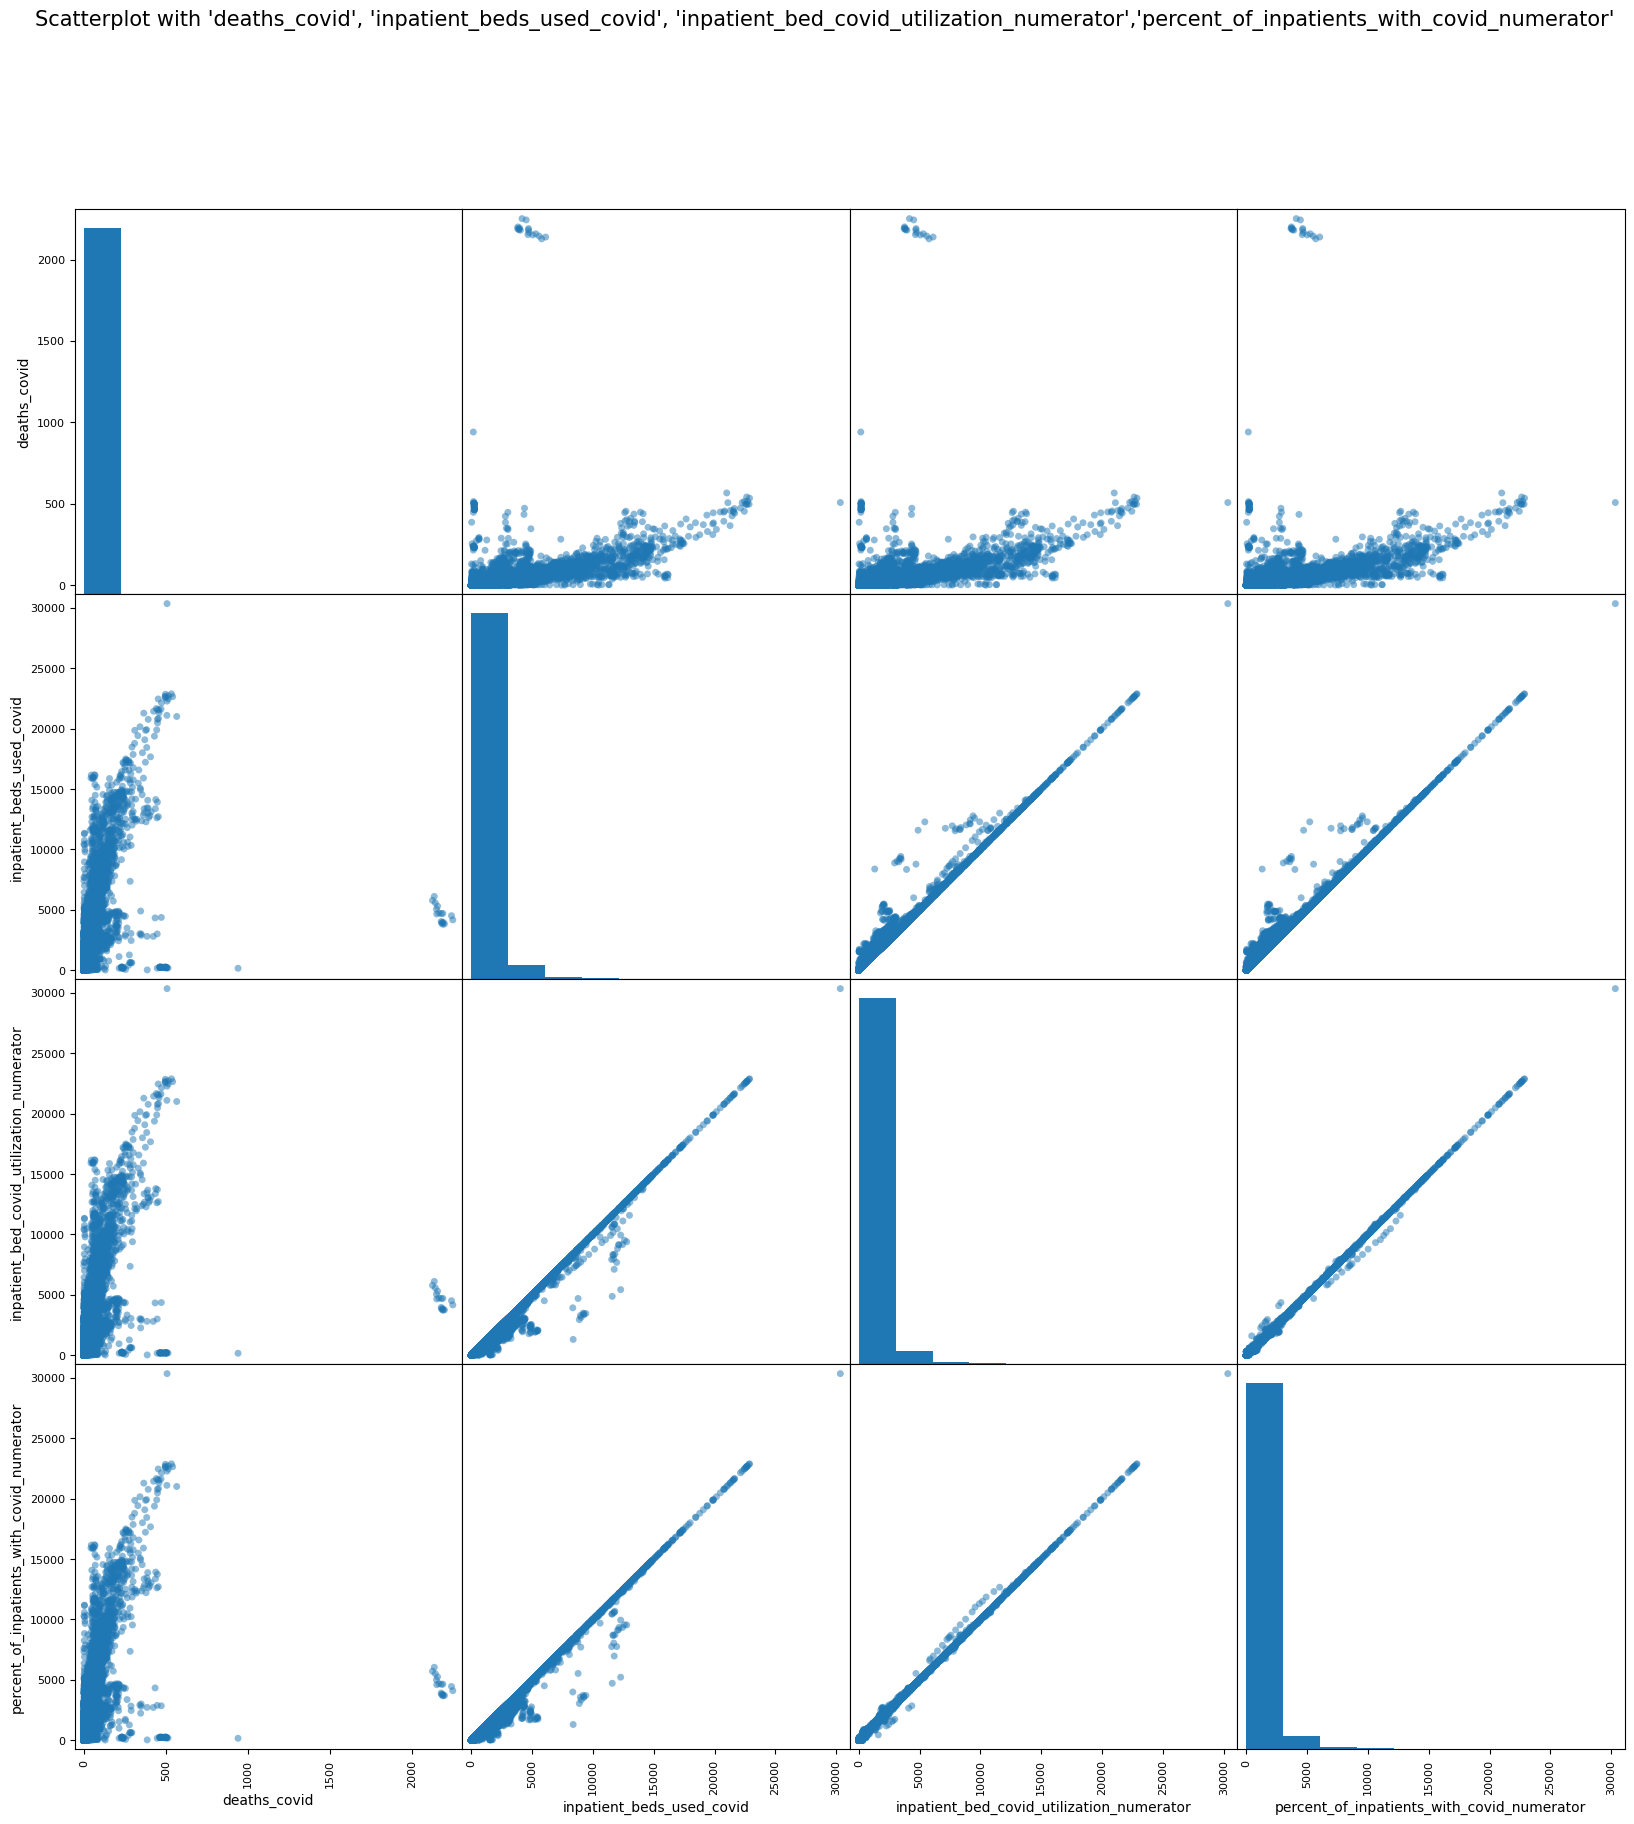

In [45]:
# Scatterplot with 'deaths_covid', 'inpatient_beds_used_covid', 'inpatient_bed_covid_utilization_numerator', and 
#    'percent_of_inpatients_with_covid_numerator'

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

attributes = ['deaths_covid', 'inpatient_beds_used_covid', 'inpatient_bed_covid_utilization_numerator',
              'percent_of_inpatients_with_covid_numerator']
scatter_matrix(covid[attributes], figsize=(20,20), s=100)
plt.suptitle("Scatterplot with 'deaths_covid', 'inpatient_beds_used_covid', 'inpatient_bed_covid_utilization_numerator',\
'percent_of_inpatients_with_covid_numerator'", fontsize=15)
plt.show()             

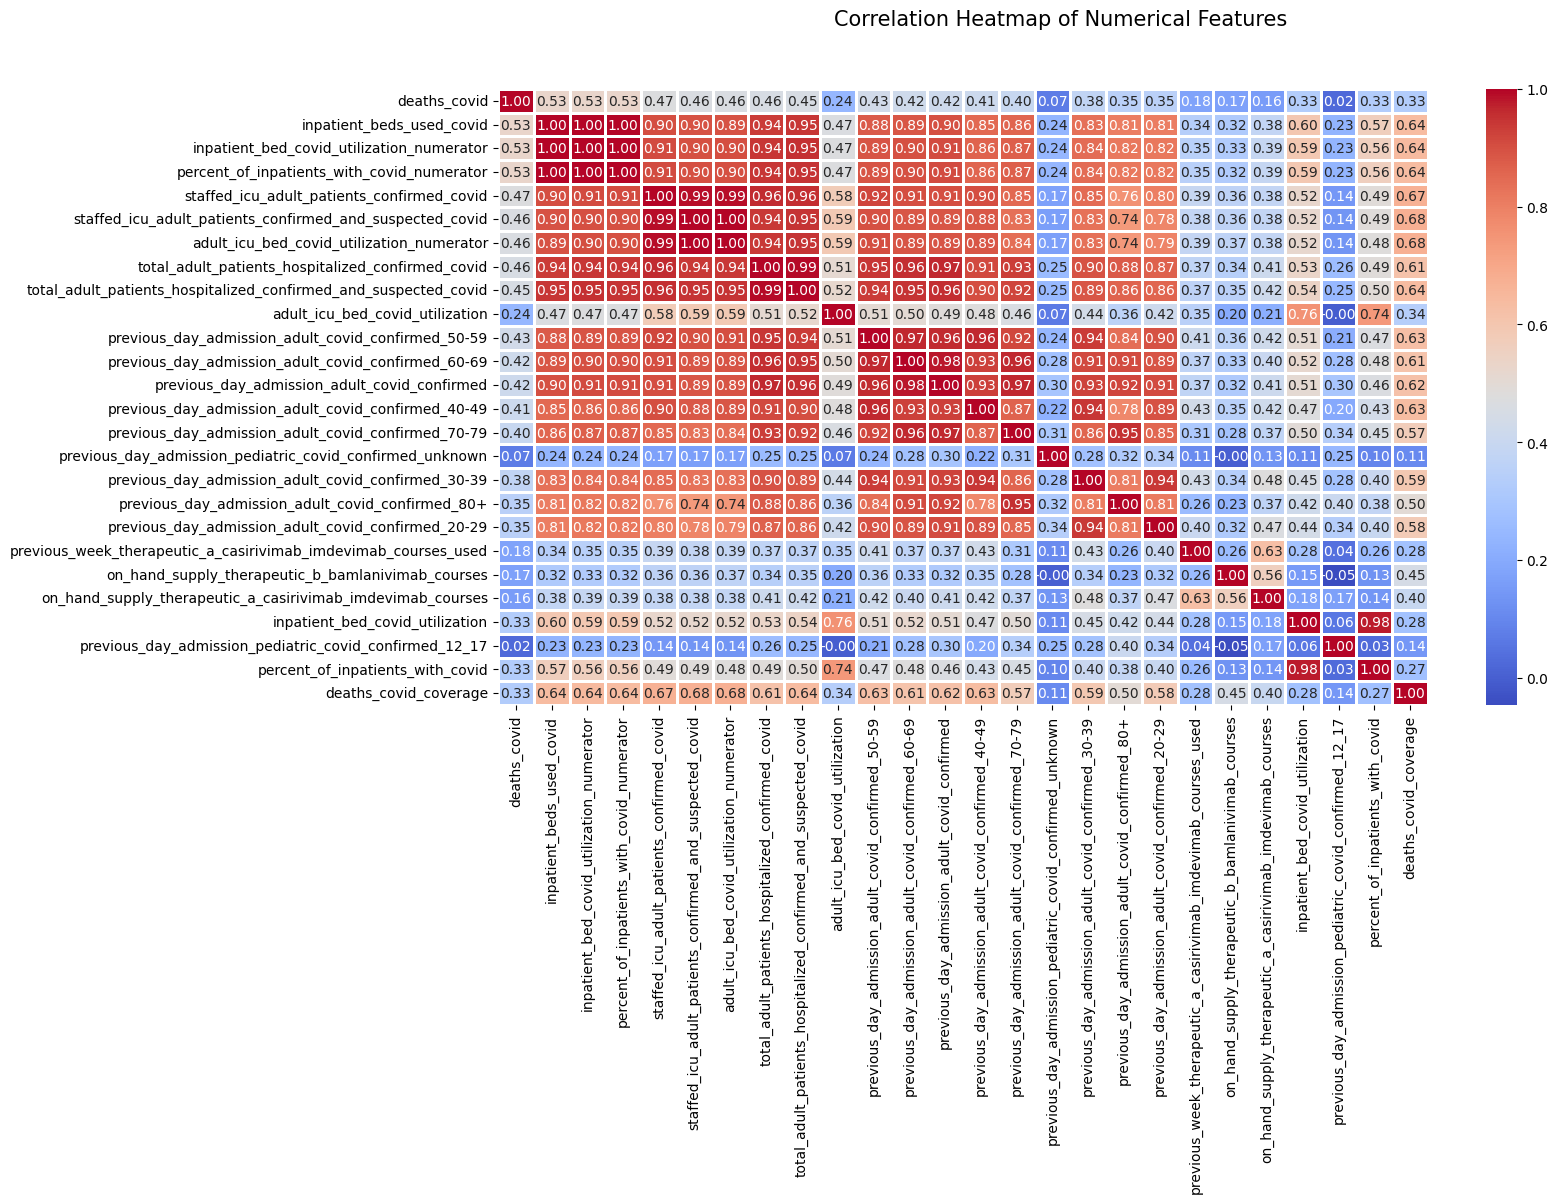

In [46]:
# Correlation Heatmap of Top 25 Numerical Features with Highest Correlation to 'deaths_covid'

num_cols_top25 = ['deaths_covid', 'inpatient_beds_used_covid', 'inpatient_bed_covid_utilization_numerator', 
                     'percent_of_inpatients_with_covid_numerator','staffed_icu_adult_patients_confirmed_covid', 
                     'staffed_icu_adult_patients_confirmed_and_suspected_covid', 'adult_icu_bed_covid_utilization_numerator', 
                     'total_adult_patients_hospitalized_confirmed_covid', 'total_adult_patients_hospitalized_confirmed_and_suspected_covid', 
                     'adult_icu_bed_covid_utilization', 'previous_day_admission_adult_covid_confirmed_50-59', 
                     'previous_day_admission_adult_covid_confirmed_60-69',
                     'previous_day_admission_adult_covid_confirmed', 'previous_day_admission_adult_covid_confirmed_40-49',
                     'previous_day_admission_adult_covid_confirmed_70-79', 'previous_day_admission_pediatric_covid_confirmed_unknown',
                     'previous_day_admission_adult_covid_confirmed_30-39', 'previous_day_admission_adult_covid_confirmed_80+',
                     'previous_day_admission_adult_covid_confirmed_20-29', 'previous_week_therapeutic_a_casirivimab_imdevimab_courses_used',
                     'on_hand_supply_therapeutic_b_bamlanivimab_courses', 'on_hand_supply_therapeutic_a_casirivimab_imdevimab_courses',
                     'inpatient_bed_covid_utilization', 'previous_day_admission_pediatric_covid_confirmed_12_17',
                     'percent_of_inpatients_with_covid', 'deaths_covid_coverage']

corr_matrix_top25 = covid[num_cols_top25].corr()

import seaborn as sns

plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix_top25, annot=True, cmap='coolwarm', fmt='.2f', linewidth=1)
plt.suptitle('Correlation Heatmap of Numerical Features', fontsize=15)
plt.show()

In [47]:
covid_num = covid[num_cols_top25]

covid_num.head()

,deaths_covid,inpatient_beds_used_covid,inpatient_bed_covid_utilization_numerator,percent_of_inpatients_with_covid_numerator,staffed_icu_adult_patients_confirmed_covid,staffed_icu_adult_patients_confirmed_and_suspected_covid,adult_icu_bed_covid_utilization_numerator,total_adult_patients_hospitalized_confirmed_covid,total_adult_patients_hospitalized_confirmed_and_suspected_covid,adult_icu_bed_covid_utilization,...,previous_day_admission_adult_covid_confirmed_30-39,previous_day_admission_adult_covid_confirmed_80+,previous_day_admission_adult_covid_confirmed_20-29,previous_week_therapeutic_a_casirivimab_imdevimab_courses_used,on_hand_supply_therapeutic_b_bamlanivimab_courses,on_hand_supply_therapeutic_a_casirivimab_imdevimab_courses,inpatient_bed_covid_utilization,previous_day_admission_pediatric_covid_confirmed_12_17,percent_of_inpatients_with_covid,deaths_covid_coverage
0,0.0,125.0,125.0,125.0,39.0,43.0,43.0,71.0,117.0,0.031852,...,0.0,2.0,1.0,8.0,2554.0,2390.0,0.007390,0.0,0.008865,78
1,1.0,40.0,40.0,40.0,18.0,19.0,19.0,40.0,40.0,0.177570,...,0.0,2.0,0.0,8.0,520.0,369.0,0.027211,0.0,0.061920,28
2,0.0,265.0,265.0,265.0,93.0,96.0,96.0,333.0,261.0,0.052922,...,3.0,3.0,1.0,48.0,5243.0,1098.0,0.019280,0.0,0.030643,217
3,1.0,86.0,86.0,86.0,6.0,6.0,6.0,47.0,86.0,0.040541,...,0.0,1.0,0.0,0.0,100.0,0.0,0.034236,0.0,0.036815,14
4,1.0,137.0,137.0,137.0,37.0,43.0,43.0,115.0,134.0,0.051435,...,5.0,2.0,1.0,4.0,1935.0,1306.0,0.015343,0.0,0.025133,147


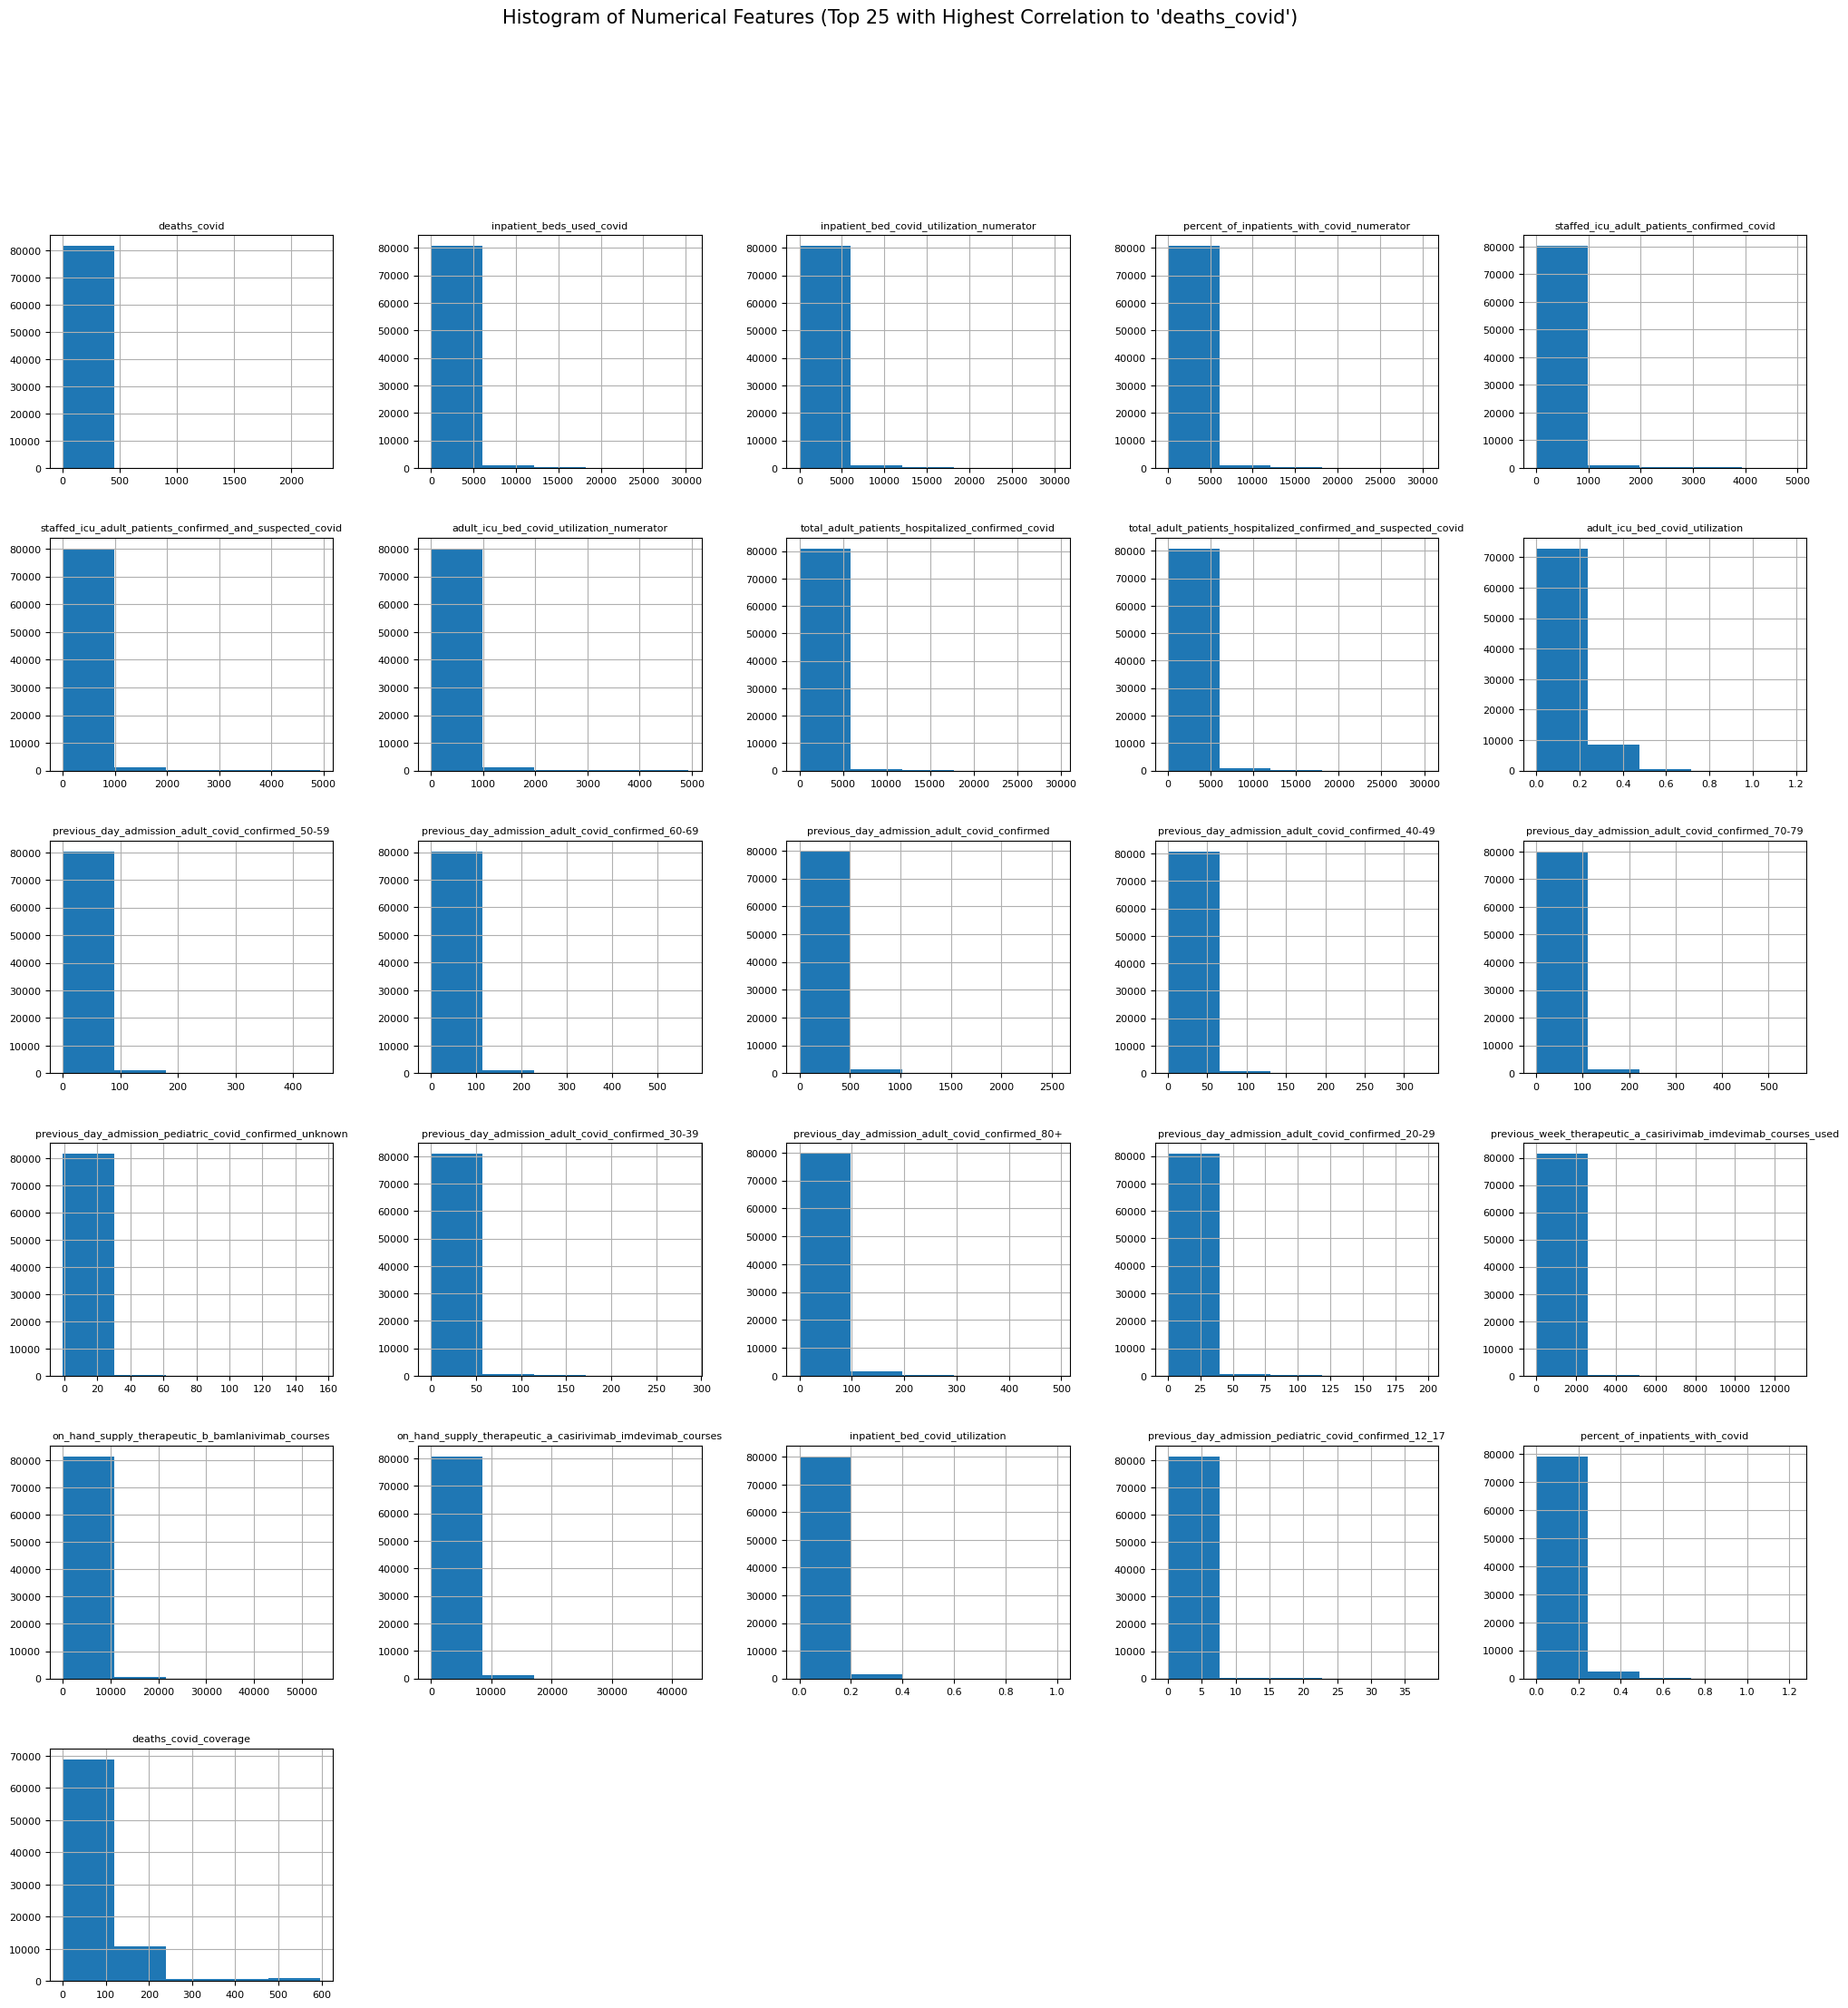

In [48]:
# Histogram of Numerical Features

plt.rc('font', size=8)
plt.rc('axes', labelsize=8, titlesize=8)
plt.rc('legend', fontsize=8)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

covid_num.hist(bins=5, figsize=(25, 25))
plt.suptitle("Histogram of Numerical Features (Top 25 with Highest Correlation to 'deaths_covid')", fontsize=15)
plt.show()

### III - Prepare the Data

In [50]:
cov_cols = ['critical_staffing_shortage_today_yes', 'critical_staffing_shortage_today_no', 'critical_staffing_shortage_today_not_reported',
            'critical_staffing_shortage_anticipated_within_week_yes', 'critical_staffing_shortage_anticipated_within_week_no',
            'critical_staffing_shortage_anticipated_within_week_not_reported', 'hospital_onset_covid', 'hospital_onset_covid_coverage',
            'inpatient_beds', 'inpatient_beds_coverage', 'inpatient_beds_used', 'inpatient_beds_used_coverage', 'inpatient_beds_used_covid',
            'inpatient_beds_used_covid_coverage', 'previous_day_admission_adult_covid_confirmed',
            'previous_day_admission_adult_covid_confirmed_coverage', 'previous_day_admission_adult_covid_suspected',
            'previous_day_admission_adult_covid_suspected_coverage', 'previous_day_admission_pediatric_covid_confirmed',
            'previous_day_admission_pediatric_covid_confirmed_coverage', 'previous_day_admission_pediatric_covid_suspected',
            'previous_day_admission_pediatric_covid_suspected_coverage', 'staffed_adult_icu_bed_occupancy',
            'staffed_adult_icu_bed_occupancy_coverage', 'staffed_icu_adult_patients_confirmed_and_suspected_covid',
            'staffed_icu_adult_patients_confirmed_and_suspected_covid_coverage', 'staffed_icu_adult_patients_confirmed_covid',
            'staffed_icu_adult_patients_confirmed_covid_coverage', 'total_adult_patients_hospitalized_confirmed_and_suspected_covid',
            'total_adult_patients_hospitalized_confirmed_and_suspected_covid_coverage',	'total_adult_patients_hospitalized_confirmed_covid',
            'total_adult_patients_hospitalized_confirmed_covid_coverage',
            'total_pediatric_patients_hospitalized_confirmed_and_suspected_covid',
            'total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_coverage',
            'total_pediatric_patients_hospitalized_confirmed_covid', 'total_pediatric_patients_hospitalized_confirmed_covid_coverage',
            'total_staffed_adult_icu_beds', 'total_staffed_adult_icu_beds_coverage', 'inpatient_beds_utilization',
            'inpatient_beds_utilization_coverage', 'inpatient_beds_utilization_numerator', 'inpatient_beds_utilization_denominator',
            'percent_of_inpatients_with_covid', 'percent_of_inpatients_with_covid_coverage', 'percent_of_inpatients_with_covid_numerator',
            'percent_of_inpatients_with_covid_denominator', 'inpatient_bed_covid_utilization', 'inpatient_bed_covid_utilization_coverage',
            'inpatient_bed_covid_utilization_numerator', 'inpatient_bed_covid_utilization_denominator', 'adult_icu_bed_covid_utilization',
            'adult_icu_bed_covid_utilization_coverage', 'adult_icu_bed_covid_utilization_numerator', 'adult_icu_bed_covid_utilization_denominator',
            'adult_icu_bed_utilization', 'adult_icu_bed_utilization_coverage', 'adult_icu_bed_utilization_numerator',
            'adult_icu_bed_utilization_denominator', 'geocoded_state', 'previous_day_admission_adult_covid_confirmed_18-19',
            'previous_day_admission_adult_covid_confirmed_18-19_coverage', 'previous_day_admission_adult_covid_confirmed_20-29',
            'previous_day_admission_adult_covid_confirmed_20-29_coverage', 'previous_day_admission_adult_covid_confirmed_30-39',
            'previous_day_admission_adult_covid_confirmed_30-39_coverage', 'previous_day_admission_adult_covid_confirmed_40-49',
            'previous_day_admission_adult_covid_confirmed_40-49_coverage', 'previous_day_admission_adult_covid_confirmed_50-59',
            'previous_day_admission_adult_covid_confirmed_50-59_coverage', 'previous_day_admission_adult_covid_confirmed_60-69',
            'previous_day_admission_adult_covid_confirmed_60-69_coverage', 'previous_day_admission_adult_covid_confirmed_70-79',
            'previous_day_admission_adult_covid_confirmed_70-79_coverage', 'previous_day_admission_adult_covid_confirmed_80+',
            'previous_day_admission_adult_covid_confirmed_80+_coverage', 'previous_day_admission_adult_covid_confirmed_unknown',
            'previous_day_admission_adult_covid_confirmed_unknown_coverage', 'previous_day_admission_adult_covid_suspected_18-19',
            'previous_day_admission_adult_covid_suspected_18-19_coverage', 'previous_day_admission_adult_covid_suspected_20-29',
            'previous_day_admission_adult_covid_suspected_20-29_coverage', 'previous_day_admission_adult_covid_suspected_30-39',
            'previous_day_admission_adult_covid_suspected_30-39_coverage', 'previous_day_admission_adult_covid_suspected_40-49',
            'previous_day_admission_adult_covid_suspected_40-49_coverage', 'previous_day_admission_adult_covid_suspected_50-59',
            'previous_day_admission_adult_covid_suspected_50-59_coverage', 'previous_day_admission_adult_covid_suspected_60-69',
            'previous_day_admission_adult_covid_suspected_60-69_coverage', 'previous_day_admission_adult_covid_suspected_70-79',
            'previous_day_admission_adult_covid_suspected_70-79_coverage', 'previous_day_admission_adult_covid_suspected_80+',
            'previous_day_admission_adult_covid_suspected_80+_coverage', 'previous_day_admission_adult_covid_suspected_unknown',
            'previous_day_admission_adult_covid_suspected_unknown_coverage', 'deaths_covid_coverage',
            'on_hand_supply_therapeutic_a_casirivimab_imdevimab_courses', 'on_hand_supply_therapeutic_b_bamlanivimab_courses',
            'on_hand_supply_therapeutic_c_bamlanivimab_etesevimab_courses', 'previous_week_therapeutic_a_casirivimab_imdevimab_courses_used',
            'previous_week_therapeutic_b_bamlanivimab_courses_used', 'previous_week_therapeutic_c_bamlanivimab_etesevimab_courses_used',
            'icu_patients_confirmed_influenza', 'icu_patients_confirmed_influenza_coverage', 'previous_day_admission_influenza_confirmed',
            'previous_day_admission_influenza_confirmed_coverage', 'previous_day_deaths_covid_and_influenza',
            'previous_day_deaths_covid_and_influenza_coverage', 'previous_day_deaths_influenza', 'previous_day_deaths_influenza_coverage',
            'total_patients_hospitalized_confirmed_influenza', 'total_patients_hospitalized_confirmed_influenza_and_covid',
            'total_patients_hospitalized_confirmed_influenza_and_covid_coverage', 'total_patients_hospitalized_confirmed_influenza_coverage',
            'all_pediatric_inpatient_bed_occupied', 'all_pediatric_inpatient_bed_occupied_coverage', 'all_pediatric_inpatient_beds',
            'all_pediatric_inpatient_beds_coverage', 'previous_day_admission_pediatric_covid_confirmed_0_4',
            'previous_day_admission_pediatric_covid_confirmed_0_4_coverage', 'previous_day_admission_pediatric_covid_confirmed_12_17',
            'previous_day_admission_pediatric_covid_confirmed_12_17_coverage', 'previous_day_admission_pediatric_covid_confirmed_5_11',
            'previous_day_admission_pediatric_covid_confirmed_5_11_coverage', 'previous_day_admission_pediatric_covid_confirmed_unknown',
            'previous_day_admission_pediatric_covid_confirmed_unknown_coverage', 'staffed_icu_pediatric_patients_confirmed_covid',
            'staffed_icu_pediatric_patients_confirmed_covid_coverage', 'staffed_pediatric_icu_bed_occupancy',
            'staffed_pediatric_icu_bed_occupancy_coverage', 'total_staffed_pediatric_icu_beds', 'total_staffed_pediatric_icu_beds_coverage']

```
---
'cov_cols' creation with 'deaths_covid' column removed since this is the TARGET/LABEL.
---
```

In [52]:
len(cov_cols)

132

```
---
'cov_cols' length = 132 columns (due to removal of 'deaths_covid' column).
---
```

In [54]:
from sklearn.base import BaseEstimator, TransformerMixin

class COVID_Data_Transformer(BaseEstimator, TransformerMixin):
    def __init__(self, drop_features=True):
        self.drop_features = drop_features

    def fit(self, X, y = None):
        return self

    def transform(self, X):
        if self.drop_features:
            X = X.drop(columns = ['inpatient_beds_used_covid', 'inpatient_bed_covid_utilization_numerator',\
                                  'percent_of_inpatients_with_covid_numerator'])
            return X
        else:
            return X

```
---
Creation of COVID_Data_Transformer class with use of BaseEstimator and TransformerMixin that allows the option for dropping the following features:

'inpatient_beds_used_covid'
'inpatient_bed_covid_utilization_numerator'
'percent_of_inpatients_with_covid_numerator'
---
```

In [55]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

numeric_pipeline_with_features = make_pipeline(SimpleImputer(strategy='median').set_output(transform='pandas'),\
                                               COVID_Data_Transformer(drop_features = False), StandardScaler())

numeric_pipeline_without_features = make_pipeline(SimpleImputer(strategy='median').set_output(transform='pandas'),\
                                                  COVID_Data_Transformer(drop_features = True), StandardScaler())

```
---
'numeric_pipeline_with_features' -> numerical pipeline (with SimpleImputer, StandardScaler, COVID_Data_Transformer) WITH ALL the features
---
```

```
---
'numeric_pipeline_without_features' -> numerical pipeline (with SimpleImputer, StandardScaler, COVID_Data_Transformer) WITHOUT the following features:

'inpatient_beds_used_covid'
'inpatient_bed_covid_utilization_numerator'
'percent_of_inpatients_with_covid_numerator'
---
```

In [56]:
from sklearn.compose import ColumnTransformer

column_transformer_with_features = ColumnTransformer([
    ('num', numeric_pipeline_with_features, cov_cols)
])

column_transformer_without_features = ColumnTransformer([
    ('num', numeric_pipeline_without_features, cov_cols)
])

```
---
'column_tranformer_with_features' -> ColumnTransformer WITH ALL the features
---
```

```
---
'column_transformer_without_features' -> ColumnTransformer WITHOUT the following features:

'inpatient_beds_used_covid'
'inpatient_bed_covid_utilization_numerator'
'percent_of_inpatients_with_covid_numerator'
---
```

In [57]:
column_transformer_with_features

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('covid_data_transformer',
                                                  COVID_Data_Transformer(drop_features=False)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['critical_staffing_shortage_today_yes',
                                  'critical_staffing_shortage_today_no',
                                  'critical_staffing_shortage_today_not_reported',
                                  'critical...
                                  'staffed_icu_adult_patients_confirmed_and_suspected_covid',
                                  'staffed_icu_adult_patients_confirmed_and_suspected_covid_coverage',
                                  'staffed_icu_adult_patients_confirmed_covid',
                                  'staffed_icu_adult_patients_confirmed_covid_coverage',
                                  'total_adult_patients_hospitalized_confirmed_and_suspected_covid',
                                  'total_adult_patients_hospitalized_confirmed_and_suspected_covid_coverage', ...])])

In [58]:
column_transformer_without_features

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('covid_data_transformer',
                                                  COVID_Data_Transformer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['critical_staffing_shortage_today_yes',
                                  'critical_staffing_shortage_today_no',
                                  'critical_staffing_shortage_today_not_reported',
                                  'critical_staffing_shortage_...
                                  'staffed_icu_adult_patients_confirmed_and_suspected_covid',
                                  'staffed_icu_adult_patients_confirmed_and_suspected_covid_coverage',
                                  'staffed_icu_adult_patients_confirmed_covid',
                                  'staffed_icu_adult_patients_confirmed_covid_coverage',
                                  'total_adult_patients_hospitalized_confirmed_and_suspected_covid',
                                  'total_adult_patients_hospitalized_confirmed_and_suspected_covid_coverage', ...])])

In [59]:
X_train.head()

,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,inpatient_beds,inpatient_beds_coverage,...,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_5_11_coverage,previous_day_admission_pediatric_covid_confirmed_unknown,previous_day_admission_pediatric_covid_confirmed_unknown_coverage,staffed_icu_pediatric_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid_coverage,staffed_pediatric_icu_bed_occupancy,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage
27267,7,191,72,35,174,61,91.0,264,60469.0,270,...,2.0,251,32.0,262,6.0,264,590.0,264,899.0,264
10831,46,170,6,49,167,6,12.0,216,14111.0,222,...,0.0,0,0.0,0,0.0,0,2.0,4,11.0,4
8514,2,42,82,2,42,82,0.0,124,8064.0,126,...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0
24511,2,166,11,9,159,11,265.0,170,44779.0,179,...,2.0,155,1.0,170,11.0,170,363.0,170,523.0,170
56811,0,2,42,0,3,41,60.0,42,7342.0,44,...,0.0,42,0.0,42,0.0,42,117.0,42,117.0,42


```
---
First 5 rows of 'X_train'.
---
```

In [60]:
X_train_transformed_with_features = column_transformer_with_features.fit_transform(X_train)

X_train_transformed_without_features = column_transformer_without_features.fit_transform(X_train)

```
---
'X_train_transformed_with_features' -> .fit_transform() of 'X_train' using 'column_transformer_with_features'
---
```

```
---
'X_train_transformed_without_features' -> .fit_transform() of 'X_train' using 'column_transformer_without_features'
---
```

In [61]:
X_train_transformed_with_features[0]

array([-5.96760838e-02,  2.41339295e+00,  3.51893898e-01,  1.16905151e+00,
        1.86347864e+00,  5.71163545e-01,  1.44723758e+00,  2.04829146e+00,
        3.20964372e+00,  1.84857967e+00,  3.34899005e+00,  1.85062120e+00,
        3.01312515e-01,  2.00274089e+00,  1.45493957e-01,  1.88140418e+00,
        9.41255382e-01,  2.05759582e+00,  5.45753632e+00,  1.88075618e+00,
        1.70068363e+00,  2.09515792e+00,  3.14028369e+00,  1.89054002e+00,
        1.04564644e-01,  2.08374361e+00,  4.51734670e-02,  1.88899314e+00,
        3.64604116e-01,  2.07597171e+00,  1.91492127e-01,  1.88397624e+00,
        1.35492306e-01,  2.07995719e+00,  2.26495727e-01,  1.87179733e+00,
        3.20391792e+00,  1.89274619e+00,  6.66301253e-01,  1.85527899e+00,
        3.35363179e+00,  3.21796976e+00, -6.87592565e-01,  2.03336759e+00,
        3.11139476e-01,  3.62971182e+00, -6.26490149e-01,  2.03473953e+00,
        3.12018409e-01,  3.46298473e+00, -5.77175365e-01,  2.09636472e+00,
        1.09036986e-01,  

In [62]:
X_train_transformed_without_features[0]

array([-5.96760838e-02,  2.41339295e+00,  3.51893898e-01,  1.16905151e+00,
        1.86347864e+00,  5.71163545e-01,  1.44723758e+00,  2.04829146e+00,
        3.20964372e+00,  1.84857967e+00,  3.34899005e+00,  1.85062120e+00,
        2.00274089e+00,  1.45493957e-01,  1.88140418e+00,  9.41255382e-01,
        2.05759582e+00,  5.45753632e+00,  1.88075618e+00,  1.70068363e+00,
        2.09515792e+00,  3.14028369e+00,  1.89054002e+00,  1.04564644e-01,
        2.08374361e+00,  4.51734670e-02,  1.88899314e+00,  3.64604116e-01,
        2.07597171e+00,  1.91492127e-01,  1.88397624e+00,  1.35492306e-01,
        2.07995719e+00,  2.26495727e-01,  1.87179733e+00,  3.20391792e+00,
        1.89274619e+00,  6.66301253e-01,  1.85527899e+00,  3.35363179e+00,
        3.21796976e+00, -6.87592565e-01,  2.03336759e+00,  3.62971182e+00,
       -6.26490149e-01,  2.03473953e+00,  3.46298473e+00, -5.77175365e-01,
        2.09636472e+00,  1.09036986e-01,  3.46654258e+00,  4.50100711e-01,
        1.89351097e+00,  

### IV - Shortlist Promising Models

In [64]:
from sklearn.model_selection import cross_val_score

In [65]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [66]:
cv_scores_lin_reg_with_features = -cross_val_score(lin_reg, X_train_transformed_with_features, y_train,
                                                   scoring='neg_root_mean_squared_error', cv=3)

cv_scores_lin_reg_without_features = -cross_val_score(lin_reg, X_train_transformed_without_features, y_train,
                                                      scoring='neg_root_mean_squared_error', cv=3)

rmse_lin_reg_with_features = np.mean(cv_scores_lin_reg_with_features)

rmse_lin_reg_without_features = np.mean(cv_scores_lin_reg_without_features)

print('rmse_lin_reg_with_features:', rmse_lin_reg_with_features)
print('')
print('rmse_lin_reg_without_features:', rmse_lin_reg_without_features)

rmse_lin_reg_with_features: 31.209255192413945

rmse_lin_reg_without_features: 32.15335687083521


```
---
Use of cross_val_score ->

Linear Regression with features RMSE: 31.209255192413945

Linear Regression without features RMSE: 32.15335687083521

*features excluded for 'without features':

'inpatient_beds_used_covid'
'inpatient_bed_covid_utilization_numerator'
'percent_of_inpatients_with_covid_numerator'
---
```

In [67]:
from sklearn.svm import SVR

svm_reg = SVR()

In [68]:
cv_scores_svm_with_features = -cross_val_score(svm_reg, X_train_transformed_with_features, y_train,\
                                                scoring='neg_root_mean_squared_error', cv=3)

cv_scores_svm_without_features = -cross_val_score(svm_reg, X_train_transformed_without_features, y_train,\
                                                scoring='neg_root_mean_squared_error', cv=3)

rmse_svm_with_features = np.mean(cv_scores_svm_with_features)

rmse_svm_without_features = np.mean(cv_scores_svm_without_features)

print('rmse_svm_with_features:', rmse_svm_with_features)
print('')
print('rmse_svm_without_features:', rmse_svm_without_features)

rmse_svm_with_features: 35.204359597599925

rmse_svm_without_features: 35.45478597938301


```
---
Use of cross_val_score ->

SVM Regression with features RMSE: 35.204359597599925

SVM Regression without features RMSE: 35.45478597938301

*features excluded for 'without features':

'inpatient_beds_used_covid'
'inpatient_bed_covid_utilization_numerator'
'percent_of_inpatients_with_covid_numerator'
---
```

In [69]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso()

In [70]:
cv_scores_lasso_with_features = -cross_val_score(lasso_reg, X_train_transformed_with_features, y_train,\
                                                scoring='neg_root_mean_squared_error', cv=3)

cv_scores_lasso_without_features = -cross_val_score(lasso_reg, X_train_transformed_without_features, y_train,\
                                                scoring='neg_root_mean_squared_error', cv=3)

rmse_lasso_with_features = np.mean(cv_scores_lasso_with_features)

rmse_lasso_without_features = np.mean(cv_scores_lasso_without_features)

print('rmse_lasso_with_features:', rmse_lasso_with_features)
print('')
print('rmse_lasso_without_features', rmse_lasso_without_features)

rmse_lasso_with_features: 31.990149647894203

rmse_lasso_without_features 33.09643057612391


```
---
Use of cross_val_score ->

Lasso Regression with features RMSE: 31.990149647894203

Lasso Regression without features RMSE: 33.09643057612391

*features excluded for 'without features':

'inpatient_beds_used_covid'
'inpatient_bed_covid_utilization_numerator'
'percent_of_inpatients_with_covid_numerator'
---
```

### V - Fine-Tune the System

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
param_grid = {'fit_intercept':[True, False], 'n_jobs':[None, -1]}

```
---
Use of param_grid.
---
```

In [74]:
grid_search = GridSearchCV(lin_reg, param_grid, cv=3)

#

best_params_with_features_grid_search = grid_search.fit(X_train_transformed_with_features, y_train)

best_params_with_features = best_params_with_features_grid_search.best_params_

print('best_params_with_features:', best_params_with_features_grid_search.best_params_)

print('best_score_with_features:', best_params_with_features_grid_search.best_score_)

#

print('')

#

best_params_without_features_grid_search = grid_search.fit(X_train_transformed_without_features, y_train)

best_params_without_features = best_params_without_features_grid_search.best_params_

print('best_params_without_features:', best_params_without_features_grid_search.best_params_)

print('best_score_without_features:', best_params_without_features_grid_search.best_score_)

best_params_with_features: {'fit_intercept': True, 'n_jobs': None}
best_score_with_features: 0.37902582911177357

best_params_without_features: {'fit_intercept': True, 'n_jobs': None}
best_score_without_features: 0.34096848532935065


```
---
Use of GridSearchCV above for Linear Regression.

*features excluded for 'without features':

'inpatient_beds_used_covid'
'inpatient_bed_covid_utilization_numerator'
'percent_of_inpatients_with_covid_numerator'
---
```

In [75]:
X_test_transformed_with_features = column_transformer_with_features.transform(X_test)

X_test_transformed_without_features = column_transformer_without_features.transform(X_test)

```
---
'X_test_transformed_with_features' -> .transform() of 'X_test' using 'column_transformer_with_features'
---
```

```
---
'X_test_transformed_without_features' -> .transform() of 'X-test' using 'column_transformer_without_features' 
---
```

In [76]:
X_test_transformed_with_features[0]

array([ 9.35703575e-01,  2.25923687e-01, -6.13279298e-01,  5.40213105e-01,
       -4.48542136e-02, -3.88614968e-01,  2.65688515e-01,  2.20454625e-03,
       -9.66799661e-02, -1.47869258e-01, -5.94010617e-02, -1.47436924e-01,
        1.22709543e+00, -1.91247227e-02,  1.40356340e+00, -8.38067393e-02,
        7.79465200e-02,  2.66621719e-02,  1.21416706e+00, -7.37244123e-02,
       -2.94747075e-01,  6.91246773e-02,  7.60089907e-02, -7.58882090e-02,
        9.02949494e-01,  5.85799051e-02,  9.69761382e-01, -7.84015036e-02,
        1.32731710e+00,  5.09265991e-02,  1.41434471e+00, -8.43984573e-02,
        9.02665295e-01,  5.56103603e-02,  1.55531999e+00, -7.90131336e-02,
       -1.94593305e-02, -7.47666592e-02,  5.54097011e-01, -1.43317461e-01,
       -5.66168277e-02, -9.38203500e-02,  3.15688395e+00, -6.00743032e-03,
        1.24687522e+00,  3.84640302e-02,  3.35359509e+00, -5.34133822e-03,
        1.24867834e+00, -3.80400587e-04,  2.28989056e+00,  6.63045248e-02,
        9.11695273e-01,  

In [77]:
X_test_transformed_without_features[0]

array([ 9.35703575e-01,  2.25923687e-01, -6.13279298e-01,  5.40213105e-01,
       -4.48542136e-02, -3.88614968e-01,  2.65688515e-01,  2.20454625e-03,
       -9.66799661e-02, -1.47869258e-01, -5.94010617e-02, -1.47436924e-01,
       -1.91247227e-02,  1.40356340e+00, -8.38067393e-02,  7.79465200e-02,
        2.66621719e-02,  1.21416706e+00, -7.37244123e-02, -2.94747075e-01,
        6.91246773e-02,  7.60089907e-02, -7.58882090e-02,  9.02949494e-01,
        5.85799051e-02,  9.69761382e-01, -7.84015036e-02,  1.32731710e+00,
        5.09265991e-02,  1.41434471e+00, -8.43984573e-02,  9.02665295e-01,
        5.56103603e-02,  1.55531999e+00, -7.90131336e-02, -1.94593305e-02,
       -7.47666592e-02,  5.54097011e-01, -1.43317461e-01, -5.66168277e-02,
       -9.38203500e-02,  3.15688395e+00, -6.00743032e-03,  3.84640302e-02,
        3.35359509e+00, -5.34133822e-03, -3.80400587e-04,  2.28989056e+00,
        6.63045248e-02,  9.11695273e-01,  6.65188543e-02,  7.59646667e-01,
       -7.31632486e-02,  

---

In [78]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

---

In [79]:
lin_reg.fit(X_train_transformed_with_features, y_train)

LinearRegression()

```
---
Linear Regression .fit() using 'X_train_transformed_with_features' and 'y_train'
---
```

In [80]:
final_predictions_rmse_with_features = lin_reg.predict(X_test_transformed_with_features)

final_rmse_lin_reg_with_features = mean_squared_error(y_test, final_predictions_rmse_with_features, squared=False)

final_rmse_lin_reg_with_features

/Users/rn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


35.28261942520221

```
---
'final_predictions_rmse_with_features' -> Linear Regression .predict() using `X_test_transformed_with_features`
---
```

```
---
'final_rmse_lin_reg_with_features' -> mean_squared_error using 'y_test' and 'final_predictions_rmse_with_features' 
---
```

In [81]:
r2_lin_reg_with_features = lin_reg.score(X_test_transformed_with_features, y_test)

r2_lin_reg_with_features

0.31276809130068284

```
---
'r2_lin_reg_with_features' -> Linear Regression .score() using 'X_test_transformed_with_features' and 'y_test'
---
```

---

In [82]:
lin_reg.fit(X_train_transformed_without_features, y_train)

LinearRegression()

```
---
Linear Regression .fit() using 'X_train_transformed_without_features' and 'y_train'
---
```

In [83]:
final_predictions_rmse_without_features = lin_reg.predict(X_test_transformed_without_features)

final_rmse_lin_reg_without_features = mean_squared_error(y_test, final_predictions_rmse_without_features, squared=False)

final_rmse_lin_reg_without_features

/Users/rn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


36.29493484368097

```
---
'final_predictions_rmse_without_features' -> Linear Regression .predict() using `X_test_transformed_without_features`
---
```

```
---
'final_rmse_lin_reg_without_features' -> mean_squared_error using 'y_test' and 'final_predictions_rmse_without_features' 
---
```

In [84]:
r2_lin_reg_without_features = lin_reg.score(X_test_transformed_without_features, y_test)

r2_lin_reg_without_features

0.2727667658494083

```
---
'r2_lin_reg_without_features' -> Linear Regression .score() using 'X_test_transformed_without_features' and 'y_test'
---
```

### Summary

Between Linear Regression, Support Vector Machine (SVM) Regression, and Lasso Regression, Linear Regression had the best (lowest) RMSE (Root
Mean Squared Error) for both the model that includes and does not include specific features ('inpatient_beds_used_covid', 'inpatient_bed_covid_utilization_numerator', and 'percent_of_inpatients_with_covid_numerator').

--

Linear Regression with features (initial) RMSE: 31.209255192413945

Linear Regression without features (initial) RMSE: 32.15335687083521

--

SVM Regression with features RMSE: 35.204359597599925

SVM Regression without features RMSE: 35.45478597938301

--

Lasso Regression with features RMSE: 31.990149647894203

Lasso Regression without features RMSE: 33.09643057612391

--

However, the Linear Regression with features yielded a final RMSE of 35.28261942520221 and a poor R-squared value of 0.31276809130068284, indicating the model was only able to make 31.3% accurate predictions and explain the variability with the features/attributes utilized. The increase from initial to final RMSE is minimal and most likely due to the model's generalization to new data.

Linear Regression with features (final) RMSE: 35.28261942520221

Linear Regression with features R-squared: 0.31276809130068284

And the Linear Regression without features yielded a final RMSE of 36.29493484368097 and a poor R-squared value of 0.2727667658494083, indicating the model was only able to make 27.3% accurate predictions and explain the variability with the features/attributes utilized. The increase in from initial to final RMSE is minimal and most likely due to the model's generalization to new data. 

Linear Regression without features (final) RMSE: 36.29493484368097

Linear Regression without features R-squared: 0.2727667658494083

The performance of these models are too low and would need further improvement before deployment, such as improving the selection of features, different method of handling missing data, utilizing other algorithms, etc.